In [1]:
import numpy as np # 数组常用库
import pandas as pd # 读入csv常用库
from sklearn.linear_model import LinearRegression # sk-learn库Linear Regression模型
from sklearn.model_selection import train_test_split # sk-learn库训练与测试
from sklearn import metrics # 生成各项测试指标库
import matplotlib.pyplot as plt # 画图常用库
from matplotlib import colors
import seaborn as sns
%matplotlib inline
import math #数学库

In [2]:
data = pd.read_csv("/Users/xiangliu/Desktop/House_price/housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [3]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [4]:
data.describe() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Clean up data(missing, outliners)

In [5]:
data.shape

(20640, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
## check total_bedrooms's missing data
data['total_bedrooms'].isnull().sum()

207

In [8]:
data_df = data.dropna(axis=0)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20433 non-null float64
latitude              20433 non-null float64
housing_median_age    20433 non-null float64
total_rooms           20433 non-null float64
total_bedrooms        20433 non-null float64
population            20433 non-null float64
households            20433 non-null float64
median_income         20433 non-null float64
median_house_value    20433 non-null float64
ocean_proximity       20433 non-null object
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [9]:
# Clean up outliners
def getOutliers(dataframe,column):
    column = "total_bedrooms" 
    #housing[column].plot.box(figsize=(8,8))
    des = dataframe[column].describe()
    desPairs = {"count":0,"mean":1,"std":2,"min":3,"25":4,"50":5,"75":6,"max":7}
    Q1 = des[desPairs['25']]
    Q3 = des[desPairs['75']]
    IQR = Q3-Q1
    lowerBound = Q1-1.5*IQR
    upperBound = Q3+1.5*IQR
    print("(IQR = {})Outlier are anything outside this range: ({},{})".format(IQR,lowerBound,upperBound))
    #b = df[(df['a'] > 1) & (df['a'] < 5)]
    outliners = data_df[(data_df[column] < lowerBound) | (data_df[column] > upperBound)]

    print("Outliers out of total = {} are \n {}".format(data_df[column].size,len(outliners[column])))
    #remove the outliers from the dataframe
    outlierRemoved = data_df[~data_df[column].isin(outliners[column])]
    return outlierRemoved

In [10]:
#get the outlier
data_df = getOutliers(data_df,"total_bedrooms")
data_df = getOutliers(data_df,"median_house_value")
data_df = getOutliers(data_df,"median_income")
data_df = getOutliers(data_df,"total_rooms")
data_df.info()

(IQR = 351.0)Outlier are anything outside this range: (-230.5,1173.5)
Outliers out of total = 20433 are 
 1271
(IQR = 307.0)Outlier are anything outside this range: (-172.5,1055.5)
Outliers out of total = 19162 are 
 365
(IQR = 294.0)Outlier are anything outside this range: (-155.0,1021.0)
Outliers out of total = 18797 are 
 139
(IQR = 291.0)Outlier are anything outside this range: (-151.5,1012.5)
Outliers out of total = 18658 are 
 42
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18616 entries, 0 to 20639
Data columns (total 10 columns):
longitude             18616 non-null float64
latitude              18616 non-null float64
housing_median_age    18616 non-null float64
total_rooms           18616 non-null float64
total_bedrooms        18616 non-null float64
population            18616 non-null float64
households            18616 non-null float64
median_income         18616 non-null float64
median_house_value    18616 non-null float64
ocean_proximity       18616 non-null object
dt

In [11]:
print ("Total_bedrooms column Mode is  "+str(data_df["total_bedrooms"].mode())+"\n")
print(data_df["total_bedrooms"].describe())

Total_bedrooms column Mode is  0    280.0
dtype: float64

count    18616.000000
mean       439.643586
std        213.900189
min          1.000000
25%        284.000000
50%        409.000000
75%        575.000000
max       1012.000000
Name: total_bedrooms, dtype: float64


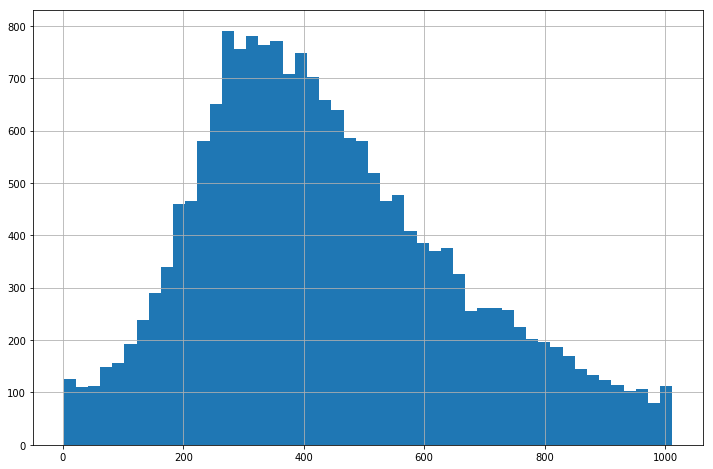

In [12]:
total_bedroms = data_df[data_df["total_bedrooms"].notnull()]["total_bedrooms"]#["total_bedrooms"]
total_bedroms.hist(figsize=(12,8),bins=50)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

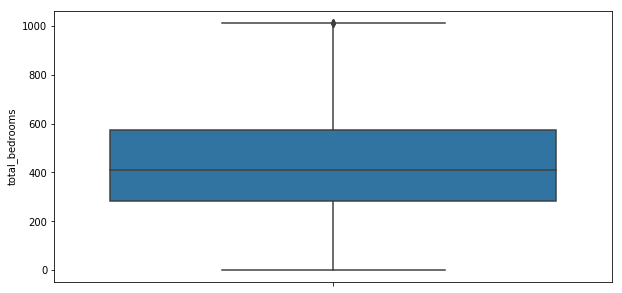

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(y='total_bedrooms',data=data_df)
plt.plot

In [14]:
#data_df=data_df[data_df['total_bedrooms']<2000]

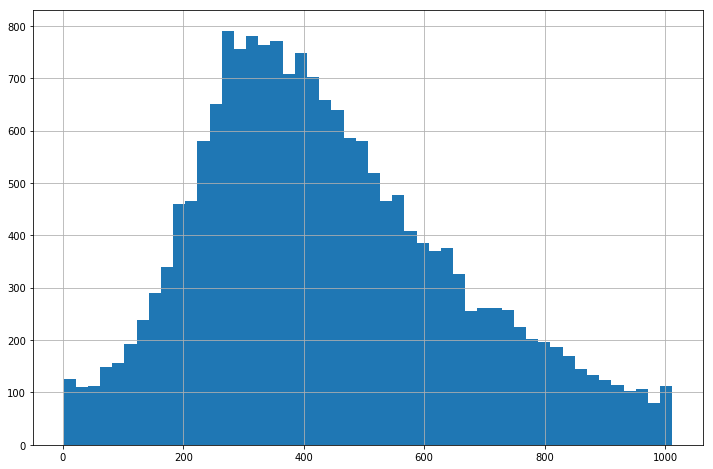

In [15]:
total_bedroms = data_df[data_df["total_bedrooms"].notnull()]["total_bedrooms"]#["total_bedrooms"]
total_bedroms.hist(figsize=(12,8),bins=50)

In [16]:
# Convert "ocean_proximity categorical data to numerical data"
# LabelEncoder can be used to normalize labels.
# It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.

# Use labelEncoder to do the convertion

In [17]:
from sklearn import preprocessing
labelEncoder = preprocessing.LabelEncoder()
print(data_df["ocean_proximity"].value_counts())
data_df["ocean_proximity"] = labelEncoder.fit_transform(data_df["ocean_proximity"])
data_df["ocean_proximity"].value_counts()
data_df.describe()
data_df.head()

<1H OCEAN     8215
INLAND        5887
NEAR OCEAN    2428
NEAR BAY      2081
ISLAND           5
Name: ocean_proximity, dtype: int64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,3


# Not use labelEncoder to do the convertion

In [18]:
data_df1 = data.dropna(axis=0)
data_df1.info()
data_df1.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20433 non-null float64
latitude              20433 non-null float64
housing_median_age    20433 non-null float64
total_rooms           20433 non-null float64
total_bedrooms        20433 non-null float64
population            20433 non-null float64
households            20433 non-null float64
median_income         20433 non-null float64
median_house_value    20433 non-null float64
ocean_proximity       20433 non-null object
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


(20433, 10)

In [19]:
data_df1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [20]:
data_df1['NEAR BAY']=0
data_df1['INLAND']=0
data_df1['<1H OCEAN']=0
data_df1['ISLAND']=0
data_df1['NEAR OCEAN']=0
data_df1.head()

/Users/xiangliu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/xiangliu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/xiangliu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,NEAR BAY,INLAND,<1H OCEAN,ISLAND,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,0,0


In [21]:
data_df1.loc[data_df1['ocean_proximity']=='NEAR BAY','NEAR BAY']=1
data_df1.loc[data_df1['ocean_proximity']=='INLAND','INLAND']=1
data_df1.loc[data_df1['ocean_proximity']=='<1H OCEAN','<1H OCEAN']=1
data_df1.loc[data_df1['ocean_proximity']=='ISLAND','ISLAND']=1
data_df1.loc[data_df1['ocean_proximity']=='NEAR OCEAN','NEAR OCEAN']=1
data_df1.head()

/Users/xiangliu/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,NEAR BAY,INLAND,<1H OCEAN,ISLAND,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1,0,0,0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1,0,0,0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1,0,0,0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1,0,0,0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1,0,0,0,0


Data Visualization

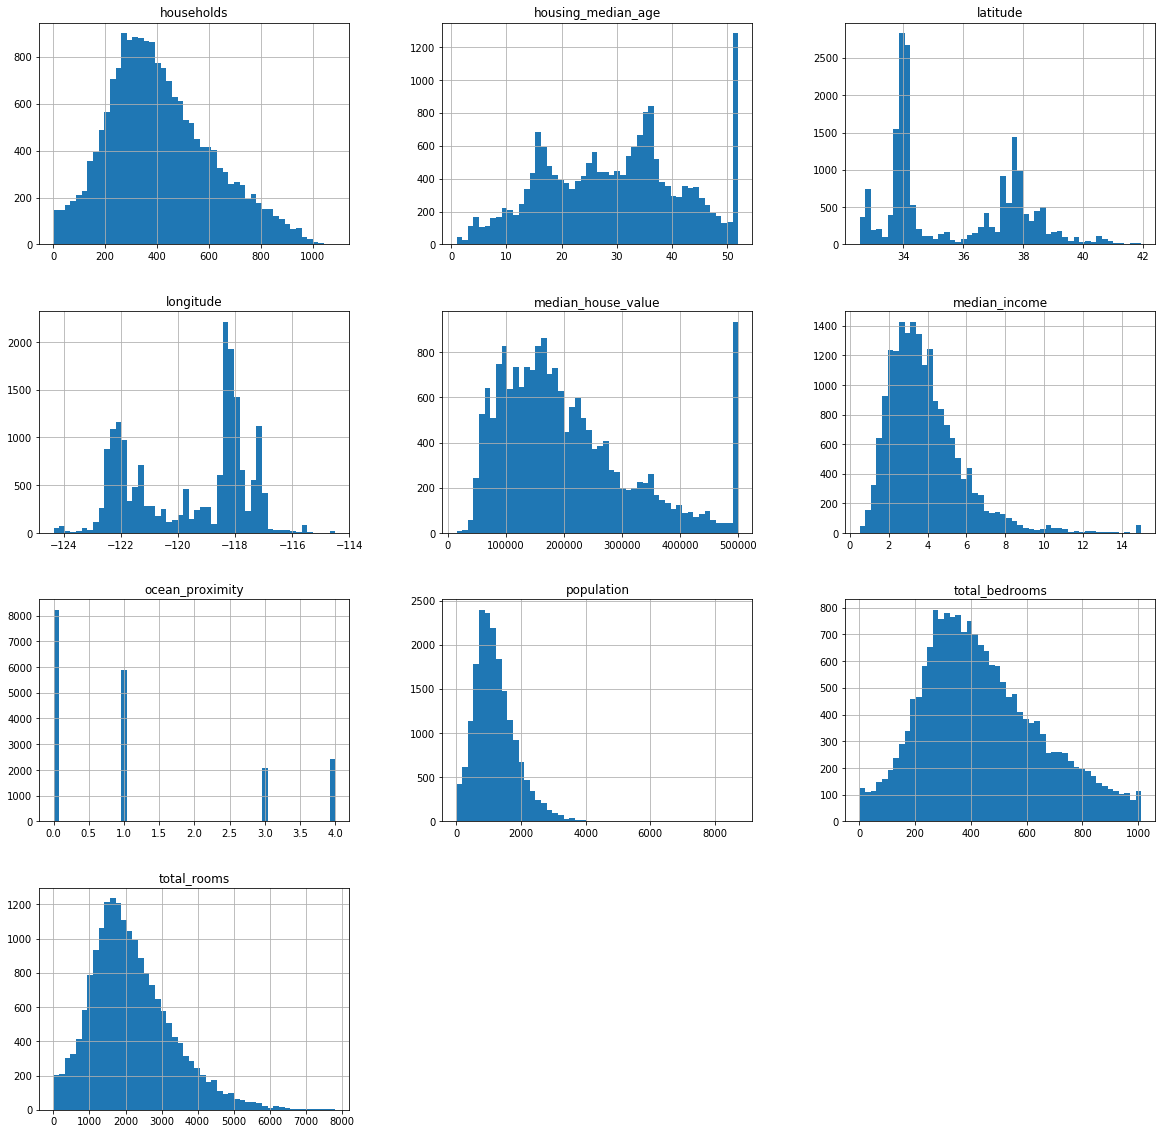

In [22]:
data_df.hist(bins=50, figsize=(20,20))
plt.show()

<Figure size 432x288 with 0 Axes>

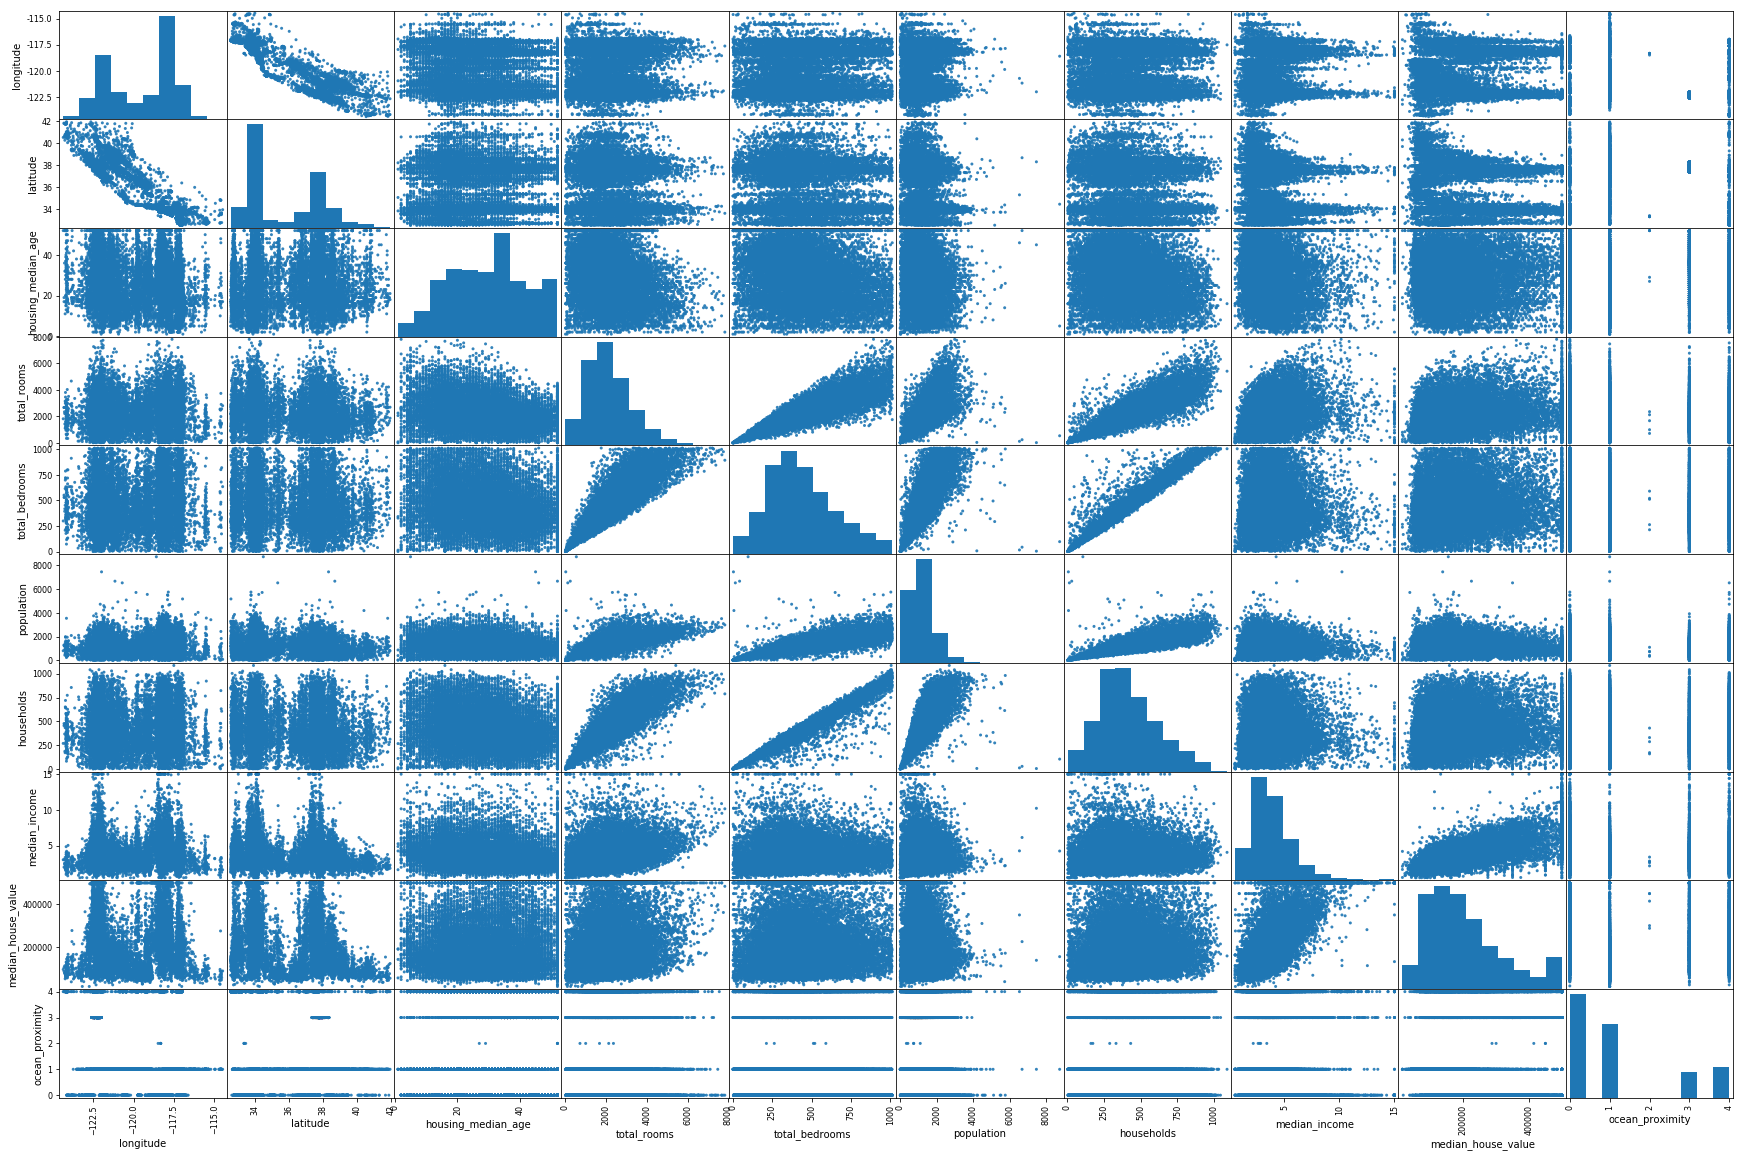

In [23]:
#display scatter_matrix
from pandas.plotting import scatter_matrix
fig = plt.figure()
scatter_matrix(data_df,figsize =(30,20),alpha=0.9);

In [24]:
import seaborn as sns
Datacorr = data_df.corr()
cmap = sns.diverging_palette(220,10,center = "light", as_cmap=True)
Datacorr.style.background_gradient(cmap)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1,-0.92445,-0.0952418,-0.00059595,0.0391119,0.114569,0.0372473,-0.0113894,-0.0386872,-0.28739
latitude,-0.92445,1,-0.00370873,-0.00693553,-0.0518783,-0.137936,-0.0720281,-0.0853382,-0.150495,0.196459
housing_median_age,-0.0952418,-0.00370873,1,-0.285582,-0.220931,-0.192811,-0.19436,-0.111408,0.112021,0.109337
total_rooms,-0.00059595,-0.00693553,-0.285582,1,0.871778,0.725435,0.869268,0.284482,0.205201,0.00162007
total_bedrooms,0.0391119,-0.0518783,-0.220931,0.871778,1,0.800539,0.973151,-0.0458199,0.0477049,0.0128796
population,0.114569,-0.137936,-0.192811,0.725435,0.800539,1,0.836895,-0.0348576,-0.0673654,-0.0860438
households,0.0372473,-0.0720281,-0.19436,0.869268,0.973151,0.836895,1,-0.00978266,0.068779,0.00506543
median_income,-0.0113894,-0.0853382,-0.111408,0.284482,-0.0458199,-0.0348576,-0.00978266,1,0.698188,-0.0178707
median_house_value,-0.0386872,-0.150495,0.112021,0.205201,0.0477049,-0.0673654,0.068779,0.698188,1,0.0794509
ocean_proximity,-0.28739,0.196459,0.109337,0.00162007,0.0128796,-0.0860438,0.00506543,-0.0178707,0.0794509,1


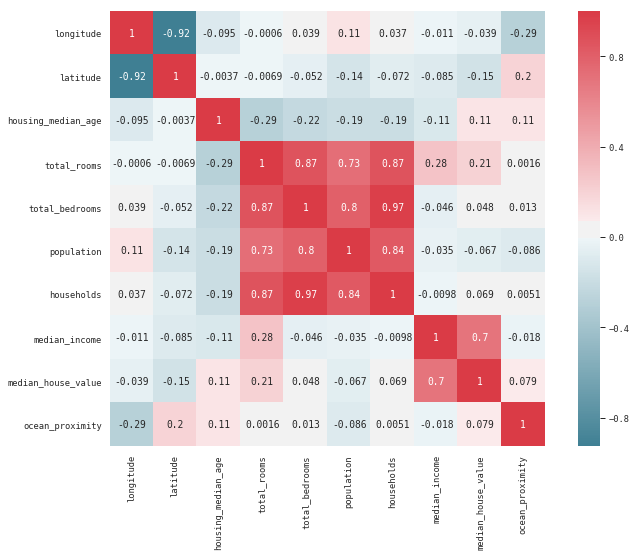

In [25]:
sns.set(context="paper",font="monospace")
data_corr_matrix = data_df.corr()
#set the matplotlib figure
fig, axe = plt.subplots(figsize=(12,8))
#Generate color palettes 
cmap = sns.diverging_palette(220,10,center = "light", as_cmap=True)
#cmap =sns.cm.rocket_r
#draw the heatmap
sns.heatmap(data_corr_matrix,vmax=1,square =True, cmap=cmap, annot=True );

# Apply LinearRegression

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# X_train = data_df.drop(['total_rooms','total_bedrooms','households',
#                         'ocean_proximity','median_house_value','longitude','latitude','housing_median_age','population'],axis=1)
X_train = data_df.drop(['median_house_value'],axis=1)
Y_train = data_df['median_house_value']

X,X_test,Y,Y_test = train_test_split(X_train, Y_train, test_size=0.2)

In [27]:
clf = LinearRegression()
clf.fit(np.array(X),Y)
confidence = clf.score(X, Y)
print("confidence: ", confidence)

confidence:  0.6537004439295262


In [28]:
#initantiate the linear regression
linearRegModel = LinearRegression(n_jobs=-1)
#fit the model to the training data (learn the coefficients)
linearRegModel.fit(X_train,Y_train)
#print the intercept and coefficients 
print("Intercept is "+str(linearRegModel.intercept_))
print("coefficients  is "+str(linearRegModel.coef_))

Intercept is -3544080.1333994106
coefficients  is [-4.22553578e+04 -4.23296088e+04  1.12187140e+03 -1.50175843e+01
  2.58484960e+02 -5.83804855e+01  3.37103493e+00  4.15396026e+04
 -8.71153033e+02]


In [29]:
y_pred = linearRegModel.predict(X_test)

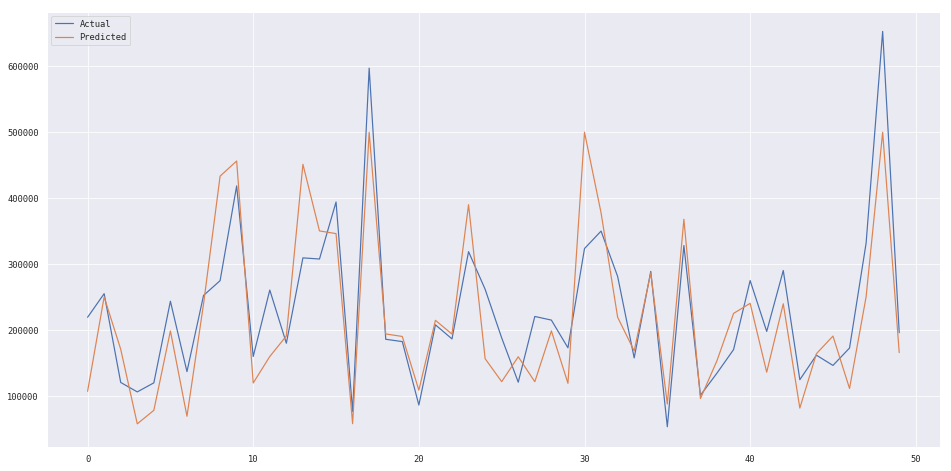

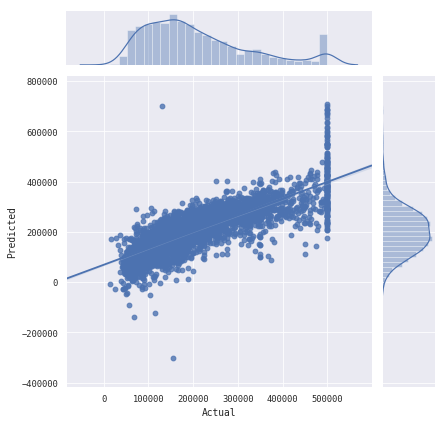

In [30]:
test = pd.DataFrame({'Predicted':y_pred,'Actual':Y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

In [31]:
print(np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))
print(np.sqrt(metrics.mean_squared_error(Y_train,linearRegModel.predict(X_train))))

68491.35558929396
68230.48730846618


In [32]:
from sklearn.metrics import mean_squared_error
predictions = clf.predict(X_test)
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)
rmse

68541.16396108332

# Perform Decision Tree Regression

In [33]:
from sklearn.tree import DecisionTreeRegressor
dtReg = DecisionTreeRegressor(max_depth=10)
dtReg.fit(X_train,Y_train)
confidence = dtReg.score(X, Y)
print("confidence: ", confidence)


confidence:  0.8426651459087362


In [34]:
dtReg_y_pred = dtReg.predict(X_test)
dtReg_y_pred

array([111175.75757576, 321063.63636364, 146022.07792208, ...,
       495529.28571429, 196902.77777778, 129352.94117647])

In [35]:
print(len(dtReg_y_pred))
print(len(Y_test))
print(dtReg_y_pred[0:5])
print(Y_test[0:5])

3724
3724
[111175.75757576 321063.63636364 146022.07792208  81260.66666667
  84745.18072289]
9943     106700.0
4707     250000.0
8410     170600.0
13983     57400.0
13580     77900.0
Name: median_house_value, dtype: float64


In [36]:
print(np.sqrt(metrics.mean_squared_error(Y_test,dtReg_y_pred)))

46049.44911738237


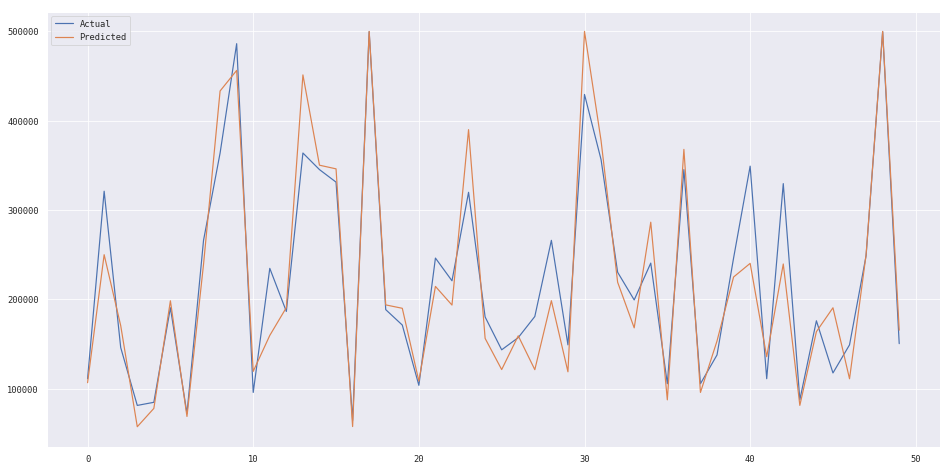

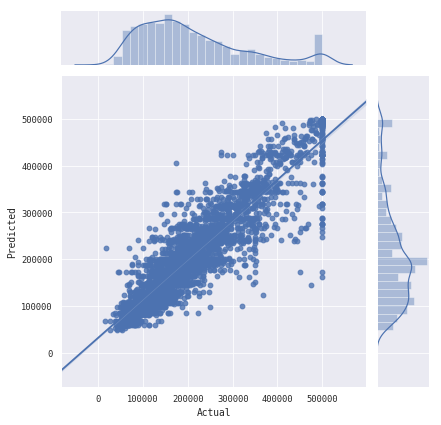

In [37]:
test = pd.DataFrame({'Predicted':dtReg_y_pred,'Actual':Y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")

In [38]:
from sklearn.tree import DecisionTreeClassifier

max_depth_range = list(range(10, 50))
# List to store the average RMSE for each value of max_depth:
accuracy = []
for i in max_depth_range:    
    dtReg = DecisionTreeRegressor(max_depth=i)
    dtReg.fit(X_train,Y_train)
    confidence = dtReg.score(X, Y)
    accuracy.append(confidence)
print(accuracy)

[0.8426650612451728, 0.8719740090457955, 0.898819051502669, 0.9199042696979743, 0.9394993312890237, 0.9554771810077091, 0.9692580284406004, 0.9796729685084548, 0.9867570356013357, 0.9913593559418434, 0.994356608942702, 0.9966206948841598, 0.998095924609507, 0.9989908005259752, 0.9994199114113994, 0.9996669781435598, 0.9998027046916613, 0.999888589329442, 0.9999368358565032, 0.9999706441786125, 0.9999792618530551, 0.999989746323463, 0.9999947199113753, 0.9999977577803612, 0.9999996976350197, 0.9999999994869391, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Text(0, 0.5, 'Accuracy')

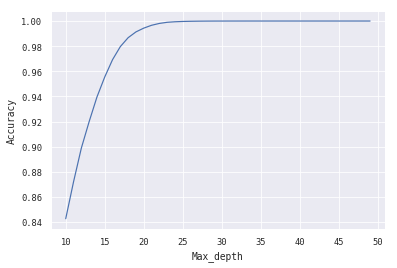

In [39]:
ax = sns.lineplot(x=max_depth_range, y=accuracy)
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
## Dex=cision max-depth is 20 reach the maximum value of accuracy

In [40]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn import datasets
# from IPython.display import Image  
# from sklearn import tree
# import pydotplus

In [41]:
# data = pd.read_csv("/Users/xiangliu/Desktop/House_price/housing.csv")
# data
# X = data_df.drop(['median_house_value','ocean_proximity'],axis=1)
# y = data_df['median_house_value']

In [42]:
# clf = DecisionTreeClassifier(random_state=0)

# # Train model
# model = clf.fit(X, y)

In [43]:
# from sklearn.tree import export_graphviz
# dot_data = tree.export_graphviz(clf, out_file=None)

# # Draw graph
# graph = pydotplus.graph_from_dot_data(dot_data) 

# -o svg
# from IPython.display import Image
# Image(filename = '/Users/xiangliu/Desktop/housing.png')
# graph.write_png("/Users/xiangliu/Desktop/housing1.png")

In [44]:
# Image(graph.create_png())

In [45]:
# graph.write_pdf("/Users/xiangliu/Desktop/iris.pdf")